In [18]:
# from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor   # 회귀 - 예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
import random

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

In [19]:
# np 구조로 변환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [20]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [21]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

### 다항회귀

In [22]:
# 자동 - 특성 제곱을 자동으로 만들어주는 라이브러리
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# 직접 특성을 추가
# 데이터 전처리
train_poly = np.column_stack((train_input**2, train_input))
# train_poly
test_poly = np.column_stack((test_input**2,test_input))

In [16]:
train_poly.shape

(42, 2)

In [24]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [25]:
# 농어 50cm    /   knr : 50cm  / lr - 선형회귀  : 1241g    /  다항회귀 :1500g
predict = lr.predict([[50**2, 50]])
predict

array([1573.98423528])

In [26]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


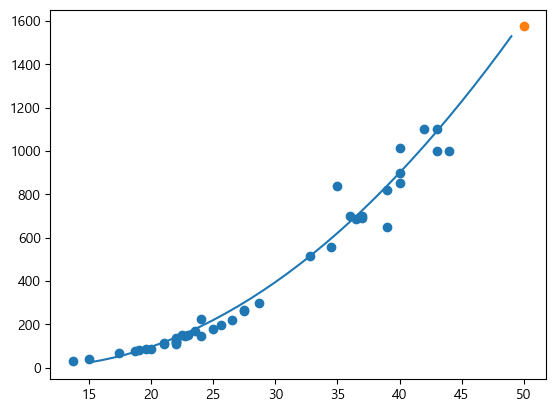

In [30]:
# 그래프 출력
# 선형회귀 - 15, 50의 값을 넣어서 선 그리기를 함 
# 다항회귀 - 직선을 여러번 그리기
plt.scatter(train_input, train_target)
x = np.arange(15,50)
plt.plot(x,(1.014*x)**2 +(-21.55)*x+ 116.1)  # 기울기*x**2+ 기울기*x + y절편
plt.scatter(50,1574)

In [31]:
# 예측률
print("train 예측률 :",lr.score(train_poly, train_target))
print("test 예측률 :",lr.score(test_poly, test_target))

train 예측률 : 0.9706807451768623
test 예측률 : 0.9775935108325122


In [10]:
df = pd.DataFrame([perch_length, perch_weight])
df = df.T
df.head(2)

df[2] = df[0]**2

In [11]:
df

,0,1,2
0,8.4,5.9,70.56
1,13.7,32.0,187.69
2,15.0,40.0,225.00
3,16.2,51.5,262.44
4,17.4,70.0,302.76
5,18.0,100.0,324.00
6,18.7,78.0,349.69
7,19.0,80.0,361.00
8,19.6,85.0,384.16
9,20.0,85.0,400.00
